# Step 1



# Team member A

Question 1 (Black Scholes Model - Close form)

 5. The information are S0 = 100; r = 5%; σ = 20%; T = 3 months


In [69]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import lognorm, norm
import scipy.stats as ss

Black Scholes Model (ATM European Call option)

In [70]:
def bs_call_price(S, r, sigma, t, T, K):
    ttm = T - t

    if ttm < 0:
        return 0.0
    elif ttm == 0.0:
        return np.maximum(S - K, 0.0)

    vol = sigma * np.sqrt(ttm)

    d_minus = np.log(S / K) + (r - 0.5 * sigma**2) * ttm
    d_minus /= vol

    d_plus = d_minus + vol

    res = S * norm.cdf(d_plus)
    res -= K * np.exp(-r * ttm) * norm.cdf(d_minus)

    return res

In [71]:
print(bs_call_price(100.0, 0.05, 0.2, 0, 3/12, 100.0))

4.6149971296028625


Black Scholes Model (ATM European Put option)

In [72]:
def bs_put_price(S, r, sigma, t, T, K):
    ttm = T - t

    if ttm < 0:
        return 0.0
    elif ttm == 0.0:
        return np.maximum(K - S, 0.0)

    vol = sigma * np.sqrt(ttm)

    d_minus = np.log(S / K) + (r - 0.5 * sigma**2) * ttm
    d_minus /= vol

    d_plus = d_minus + vol

    res = K * np.exp(-r * ttm) * norm.cdf(-d_minus)

    res -= S * norm.cdf(-d_plus)

    return res

In [73]:
print(bs_put_price(100.0, 0.05, 0.2, 0, 3/12, 100.0))

3.372777178991008


Using the black shores model in calculating call and put option price for European option. The outputs were similar to the calculation in GWP 1 which are $$4.61 and $3.37 for call and put option, respectively.

b. It does not requires to use the number of steps to determine the best fit option price. The only information that required are underlying price, strike price, volatility, maturity time and sigma.

It requires to calculate d1 (d_plus) and d2 (d_minus), and the formula has provided in the previous section.

Initially, it calculates d2 by adopting log of underlying price divide by strike price plus with risk free rate minus squared of sigma divide by 2, the total of the output will divide by sigma times with squared root of duration differences.

To obtain d1, use d2 add with sigma times with squared root of times differences. The output of d1 and d2 will be allocated inside the formula either call and put option to calculate the premium.


# Question 6

a. European call option

In [74]:
T = 3/12  # supposed in years. It is not the maturity, but the time to maturity
S = 100.0
K = 100.0
r = 0.05
vol = 0.20  # supposing it is annual
option_type = "C"  # for the put insert 'P'
# dividend yield assumed to be 0

# Compute d1 and d2
d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
d2 = d1 - vol * np.sqrt(T)

if option_type in ["C", "P"]:
    if option_type in ["C"]:
        Opt_Price = S * ss.norm.cdf(d1) - K * np.exp(-r * T) * ss.norm.cdf(d2)
        Delta = ss.norm.cdf(d1)
        Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
        Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) - r * K * np.exp(
            -r * T
        ) * ss.norm.cdf(d2)
        Rho = K * T * np.exp(-r * T) * ss.norm.cdf(d2)
    else:
        Opt_Price = K * np.exp(-r * T) * ss.norm.cdf(-d2) - S * ss.norm.cdf(-d1)
        Delta = -ss.norm.cdf(-d1)
        Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
        Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) + r * K * np.exp(
            -r * T
        ) * ss.norm.cdf(-d2)
        Rho = -K * T * np.exp(-r * T) * ss.norm.cdf(-d2)
else:
    Opt_Price = "Error: option type incorrect. Choose P for a put option or C for a call option."

print("Option price = {}".format(Opt_Price))
print("Delta = {}".format(Delta))
print("Gamma = {}".format(Gamma))
print("Vega = {}".format(Vega))
print("Theta = {}".format(Theta))
print("Rho = {}".format(Rho))

Option price = 4.614997129602855
Delta = 0.5694601832076737
Gamma = 0.03928800094473793
Vega = 19.644000472368965
Theta = -10.474151248505812
Rho = 13.082755297791127


In [75]:
T = 3/12  # supposed in years. It is not the maturity, but the time to maturity
S = 100.0
K = 100.0
r = 0.05
vol = 0.20  # supposing it is annual
option_type = "P"  # for the put insert 'P'
# dividend yield assumed to be 0

# Compute d1 and d2
d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
d2 = d1 - vol * np.sqrt(T)

if option_type in ["C", "P"]:
    if option_type in ["C"]:
        Opt_Price = S * ss.norm.cdf(d1) - K * np.exp(-r * T) * ss.norm.cdf(d2)
        Delta = ss.norm.cdf(d1)
        Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
        Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) - r * K * np.exp(
            -r * T
        ) * ss.norm.cdf(d2)
        Rho = K * T * np.exp(-r * T) * ss.norm.cdf(d2)
    else:
        Opt_Price = K * np.exp(-r * T) * ss.norm.cdf(-d2) - S * ss.norm.cdf(-d1)
        Delta = -ss.norm.cdf(-d1)
        Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
        Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) + r * K * np.exp(
            -r * T
        ) * ss.norm.cdf(-d2)
        Rho = -K * T * np.exp(-r * T) * ss.norm.cdf(-d2)
else:
    Opt_Price = "Error: option type incorrect. Choose P for a put option or C for a call option."

print("Option price = {}".format(Opt_Price))
print("Delta = {}".format(Delta))
print("Gamma = {}".format(Gamma))
print("Vega = {}".format(Vega))
print("Theta = {}".format(Theta))
print("Rho = {}".format(Rho))

Option price = 3.372777178991008
Delta = -0.43053981679232634
Gamma = 0.03928800094473793
Vega = 19.644000472368965
Theta = -5.536262246036404
Rho = -11.60668971455591


The delta value is calculating by measuring the sensitivity to underlying stock price.  The call option’s delta is using the partial derivative of call divide by partial derivative of stock price which equal to cumulative density function of d1.

The put option’s delta is using the partial derivative of put divide by partial derivative of stock price which equal to cumulative density function of d1 minus 1.


b. The Greek delta’s value in Black Scholes have slightly different of 0.0003 that more than GWP1’s method.

Greek delta’s value in Black Scholes shows 0.5694 and -0.4305 of call and put option respectively at T0. The delta value provides the signal to buyer or seller on how much the shares of option need to buy or sell at initial stage to achieve either ATM and ITM. As people probably may not consider to target or exercise OTM option.

#Question 7

Volatility increse to 0.25

In [76]:
print(bs_call_price(100.0, 0.05, 0.25, 0, 3/12, 100.0))
print(bs_put_price(100.0, 0.05, 0.25, 0, 3/12, 100.0))

5.598400241450669
4.356180290838807


As shown from the above, the option prices for call and put also increase from "$4.61 to $5.60 and $3.37 to $4.36", respectively. Increase of option prices are still within expectation as the seller requires to bear more risk. As an exchange, the premium will be increased.

In [77]:
T = 3/12  # supposed in years. It is not the maturity, but the time to maturity
S = 100.0
K = 100.0
r = 0.05
vol = 0.25  # supposing it is annual
option_type = "C"  # for the put insert 'P'
# dividend yield assumed to be 0

# Compute d1 and d2
d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
d2 = d1 - vol * np.sqrt(T)

if option_type in ["C", "P"]:
    if option_type in ["C"]:
        Opt_Price = S * ss.norm.cdf(d1) - K * np.exp(-r * T) * ss.norm.cdf(d2)
        Delta = ss.norm.cdf(d1)
        Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
        Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) - r * K * np.exp(
            -r * T
        ) * ss.norm.cdf(d2)
        Rho = K * T * np.exp(-r * T) * ss.norm.cdf(d2)
    else:
        Opt_Price = K * np.exp(-r * T) * ss.norm.cdf(-d2) - S * ss.norm.cdf(-d1)
        Delta = -ss.norm.cdf(-d1)
        Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
        Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) + r * K * np.exp(
            -r * T
        ) * ss.norm.cdf(-d2)
        Rho = -K * T * np.exp(-r * T) * ss.norm.cdf(-d2)
else:
    Opt_Price = "Error: option type incorrect. Choose P for a put option or C for a call option."

print("Option price = {}".format(Opt_Price))
print("Delta = {}".format(Delta))
print("Gamma = {}".format(Gamma))
print("Vega = {}".format(Vega))
print("Theta = {}".format(Theta))
print("Rho = {}".format(Rho))

Option price = 5.598400241450669
Delta = 0.5645439358620384
Gamma = 0.031496769230776885
Vega = 19.685480769235554
Theta = -12.385540051855436
Rho = 12.713998336188293


In [78]:
T = 3/12  # supposed in years. It is not the maturity, but the time to maturity
S = 100.0
K = 100.0
r = 0.05
vol = 0.25  # supposing it is annual
option_type = "P"  # for the put insert 'P'
# dividend yield assumed to be 0

# Compute d1 and d2
d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
d2 = d1 - vol * np.sqrt(T)

if option_type in ["C", "P"]:
    if option_type in ["C"]:
        Opt_Price = S * ss.norm.cdf(d1) - K * np.exp(-r * T) * ss.norm.cdf(d2)
        Delta = ss.norm.cdf(d1)
        Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
        Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) - r * K * np.exp(
            -r * T
        ) * ss.norm.cdf(d2)
        Rho = K * T * np.exp(-r * T) * ss.norm.cdf(d2)
    else:
        Opt_Price = K * np.exp(-r * T) * ss.norm.cdf(-d2) - S * ss.norm.cdf(-d1)
        Delta = -ss.norm.cdf(-d1)
        Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
        Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) + r * K * np.exp(
            -r * T
        ) * ss.norm.cdf(-d2)
        Rho = -K * T * np.exp(-r * T) * ss.norm.cdf(-d2)
else:
    Opt_Price = "Error: option type incorrect. Choose P for a put option or C for a call option."

print("Option price = {}".format(Opt_Price))
print("Delta = {}".format(Delta))
print("Gamma = {}".format(Gamma))
print("Vega = {}".format(Vega))
print("Theta = {}".format(Theta))
print("Rho = {}".format(Rho))

Option price = 4.356180290838807
Delta = -0.43545606413796156
Gamma = 0.031496769230776885
Vega = 19.685480769235554
Theta = -7.447651049386028
Rho = -11.975446676158741


# Vega comparison


It used to measure the change in the option’s price by 1% increment.  
Call option
Vega = 19.644000472368965 - (0.20)
Vega = 19.685480769235554 – (0.25)

Put option
Vega = 19.644000472368965- (0.20)
Vega = 19.685480769235554- (0.25)

Both call and put option’s vega (sensitivity of volatility) were increased from 19.64 to 19.69. This means increase with 5% of volatility, the option price for call and put will increase by $0.99 .  


# Team member B

European call and put

Question 5 (a)

In [79]:
import numpy as np
np.random.seed(42)

def bs_option_mc(S0, K, r, sigma, T, option_type='C', Ite=10000):
    # Parameters
    dt = 1/252  # Daily time-step, assuming 252 trading days in a year
    steps = int(T / dt)  # Number of time-steps

    # Simulating the asset paths
    ST = np.zeros(Ite)
    for i in range(Ite):
        S = S0
        for t in range(steps):
            z = np.random.normal()
            S = S * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)
        ST[i] = S

    # Calculate the payoff
    if option_type == 'C':
        payoff = np.maximum(ST - K, 0)
    else:  # option_type == 'P'
        payoff = np.maximum(K - ST, 0)

    # Discounted average payoff
    option_price = np.exp(-r * T) * np.mean(payoff)

    return option_price

# Parameters
S0 = 100  # Initial stock price
r = 0.05  # Risk-free rate
sigma = 0.20  # Volatility
T = 3/12  # Time to maturity in years (3 months)
K = S0  # ATM option, strike price is equal to the initial stock price
Ite=10000
# Pricing the call and put options
call_price = bs_option_mc(S0, K, r, sigma, T, option_type='C', Ite=Ite)
put_price = bs_option_mc(S0, K, r, sigma, T, option_type='P', Ite=Ite)

call_price, put_price
print(f"European call price and put price are : {round(call_price,2)} and {round(put_price,2)} respectively")


European call price and put price are : 4.56 and 3.41 respectively


Question 5 (b)

The function prices the call and put prices for European option using GBM process using Monte Carlo method. It has paramaters; initial stock price  S0 , strike price  K , risk-free rate  r , volatility  σ , time to maturity  T , and the number of iterations  Ite

Assuming 252 trading days, dt=1/252 A simulation of asset price is run based on GBM model and payoffs calculated at maturity.

Option price is then discounted to get the present value.

10,000 simulations were used to get a high level of accuracy and reliability in option pricing estimation.

Question 6(a)

In [80]:
# Compute d1 and d2
d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

Delta_call_option = ss.norm.cdf(d1)
Delta_put_option = -ss.norm.cdf(-d1)


print(f"The Greek Delta for call option and put option are : {round(Delta_call_option,2)} and {round(Delta_put_option,2)} respectively")

The Greek Delta for call option and put option are : 0.57 and -0.43 respectively


Question 6(b)

The delta for call option is a positive (0.57) whereas that of put option is a negative (-0.43). This is because a call option value increases as value of underlying increases and for put option, the value decreases as underlying increases.

Delta proxies for hedge ratio, showing amount of underlying asset needed to hedge an option. A positive delta makes sense for a call option as it has a positive response to underlying value movement whereas a negative delta makes sense for put option as it responds opposite to the movement in underlying value

Question 7(a)

In [81]:
sigma = 0.25
np.random.seed(42)

# Compute d1 and d2
d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)
Vega = S0 * ss.norm.pdf(d1) * np.sqrt(T)

# Pricing the call and put options
call_price = round(bs_option_mc(S0, K, r, sigma, T, option_type='C', Ite=10000),2)
put_price = round(bs_option_mc(S0, K, r, sigma, T, option_type='P', Ite=10000),2)


print(f"Vega is: {round(Vega,2)}")
print("The initial European call price and put price are : 4.56 and 3.41 respectively")
print(f"European_call_price and put price are : {call_price} and {put_price} respectively")

Vega is: 19.69
The initial European call price and put price are : 4.56 and 3.41 respectively
European_call_price and put price are : 5.53 and 4.4 respectively


The price of call increased from 4.56 to 5.53 whereas that of put option increased from 3.41 to 4.4. Therefore, the prices increase with an increase in volatility for both options.

Question 7(b)

With an identical vega of 19.69 using the 5% increase in volatility, the absolute change for both put and call options are uniform. However, relative change depends on other factors like delta, initial underlying stock.

# Team member C

#Question 3(a)

Put-Call Parity in Black-Scholes vs Monte-Carlo Methods

Put-Call Parity:        
$C_0 + Ke^{-rT} = S_0 + P_0$

Outputs from Step1.1 :
##### Black Scholes Model European Option Prices:
call_price = 4.61\
put_price = 3.37

With a 5% increase in volatility (from 20% to 25%)\
call_price = 5.60\
put_price = 4.36

##### Check for Put-Call Parity

In [82]:
# Black Scholes Model ATM European
call_price = 4.61
put_price = 3.37
K = 100
S0 = 100
𝑟 = 0.05
𝑇 = 3/12

print("call side =", round(call_price + K * np.exp(-0.05 * 0.25),2))
print("put side =", round(100 + put_price, 2))

# Check if put-call parity holds
if round(call_price + K * np.exp(-0.05 * 0.25), 2) == round(100 + put_price, 2):
   print(f"At K={K}: Put-Call Parity holds")

else:
      print(f"At K={K}: Put-Call Parity does not hold")

call side = 103.37
put side = 103.37
At K=100: Put-Call Parity holds


In [83]:
# With a 5% increase in volatility (from 20% to 25%)
call_price = 5.60
put_price = 4.36

print("Call side =", round(call_price + K * np.exp(-0.05 * 0.25),2))
print("Put side =", round(100 + put_price, 2))

# Check if put-call parity holds
if round(call_price + K * np.exp(-0.05 * 0.25), 2) == round(100 + put_price, 2):
   print(f"At K={K}: Put-Call Parity holds")

else:
      print(f"At K={K}: Put-Call Parity does not hold")

Call side = 104.36
Put side = 104.36
At K=100: Put-Call Parity holds


### Step 1.3 b
### Converge of BS and MC methods

In [84]:
# Black Scholes Model European Call and Put Option Prices with σ=20% and 25%, respectively:
data1 = [4.61, 3.37, 5.60, 4.36]
# Monte-Carlo method European Call and Put Option Prices with σ=20% and 25%, respectively:
data2 = [4.62, 3.35, 5.70, 4.34 ]

difference = np.array(data2) - np.array(data1)
percentage_difference = np.round((difference / np.array(data1)) * 100, 2)
print("Black Scholes Model and Monte-Carlo method Option Price Difference:", difference)
print("Black Scholes Model and Monte-Carlo method Option Price Difference%:", percentage_difference)

Black Scholes Model and Monte-Carlo method Option Price Difference: [ 0.01 -0.02  0.1  -0.02]
Black Scholes Model and Monte-Carlo method Option Price Difference%: [ 0.22 -0.59  1.79 -0.46]


##### ** Observation **
Above results show small differences of option prices between Black Scholes Model and Monte-Carlo methods,\
therefore these two methods converge.

The Black-Scholes Model assumes that the price of the underlying asset follows a geometric Brownian motion, it offers a closed-form solution to calculate the option prices. While the Monte Carlo method, is a numerical method that uses random sampling to simulate the possible paths of the underlying asset price. By generating a large number of random paths and calculating the option payoffs along these paths, the Monte Carlo method can estimate the expected option price.

Although the two methods are conceptually different, they are both based on the same assumptions about the behavior of the underlying asset price, including: The both models that the underlying asset price follow continuous movement, random walk and the returns of the underlying asset price are normally distributed; it’s also assumed by both methods that there are no arbitrage opportunities and the volatility is constant over a period of time under question.

These assumptions provide a simplified framework for pricing. As a result, when the number of simulations in the Monte Carlo method is large enough, the estimated option price will converge to the theoretical price predicted by the Black-Scholes Model.

In reality, more complex models may be required.

# Step 2

# Team member A

# Question 5

In [85]:
def american_option_mc(S, K, r, sigma, T, t, Ite, steps):
    np.random.seed(40)
    dt = (T - t) / steps
    discount = np.exp(-r * dt)

    # Generate simulated price paths
    ST = np.zeros((Ite, steps + 1))
    ST[:, 0] = S
    for i in range(1, steps + 1):
        z = np.random.normal(0, 1, Ite)
        ST[:, i] = ST[:, i - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)

    # Initialize payoff matrix
    payoff = np.maximum(0, ST - K)

    # Initialize cashflows with terminal payoff
    cashflows = payoff[:, -1]

    for i in range(steps - 1, 0, -1):
        # Identify in-the-money paths
        in_the_money = payoff[:, i] > 0
        X = ST[in_the_money, i]
        Y = cashflows[in_the_money] * discount

        # Fit regression model to estimate continuation value
        if len(X) == 0:
            continue
        reg = np.polyfit(X, Y, 2)
        continuation_value = np.polyval(reg, X)

        # Update cashflows: max of immediate exercise and continuation value
        cashflows[in_the_money] = np.maximum(payoff[in_the_money, i], continuation_value)
        cashflows[~in_the_money] *= discount

    # Discount the first time step
    cashflows *= discount

    return np.mean(cashflows)


american_option_mc(100, 100, 0.05, 0.2, 3/12, 0, 10000, 100)

4.748150851977084

The codes were showing American call option that using monte Carlo method to calculate the option price. American call option prices are always higher than European due to its flexibility of exercise the option at anytime before the maturity time.
Compare to the GWP1’s European call prices, American option is $$4.75 which is higher than $4.61.

Iterations of 10,000 has been used which demand to increase the accuracy. The number of steps is calculate based on the trading days of 252.




b. In Monte Carlo method, it does require to use the number of steps to determine the best fit option price. Based on the GWP1’s, the best simulation step is 100 and using to calculate the option price. The only information that required are underlying price, strike price, volatility, maturity time, iteration, number of steps, and sigma.

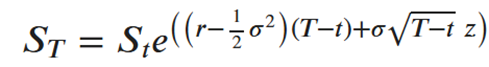

The formula of Monte Carlo method used to calculate the American option price. To meet the characteristic of American option, it has added polynomial regression and continuation value to calculate the option price that can exercise at any time.


# Question 6

In [86]:
def monte_carlo_delta(S, K, r, vol, T, Ite):
    np.random.seed(40)
    dt = T / 252  # Assuming 252 trading days in a year

    # Generate simulated price paths
    ST = np.zeros((Ite, 2))
    for i in range(Ite):
        z = np.random.normal(0, 1, 2)
        ST[i, 0] = S * np.exp((r - 0.5 * vol**2) * dt + vol * np.sqrt(dt) * z[0])  # Simulated underlying price
        ST[i, 1] = S * np.exp((r - 0.5 * vol**2) * dt + vol * np.sqrt(dt) * z[1])  # Simulated underlying price

    # Calculate option prices using Monte Carlo methods
    Option_Prices = np.maximum(ST - K, 0) * np.exp(-r * T)
    Option_Price = np.mean(Option_Prices)

    # Delta
    Delta = (Option_Prices[:, 0].mean() - Option_Prices[:, 1].mean()) / (S * 0.01)

    # Gamma
    Gamma = np.mean((Option_Prices[:, 0] - 2 * Option_Price + Option_Prices[:, 1]) / (S ** 2 * 0.01 ** 2))

    # Vega
    Vega = np.mean(ST[:, 0] * np.sqrt(T) * ss.norm.pdf((np.log(ST[:, 0] / S) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))))

    # Theta
    Theta = (Option_Prices[:, 1].mean() - Option_Prices[:, 0].mean()) / dt

    # Rho
    Rho = (Option_Prices[:, 0].mean() - Option_Prices[:, 1].mean()) / (2 * r * 0.01)

    return Delta, Gamma, Vega, Theta, Rho

Delta, Gamma, Vega, Theta, Rho = monte_carlo_delta(100, 100, 0.05, 0.2, 3/12, 10000)

print(Delta)


0.0011071645381142137


The Greek delta for American call option is 0.0011 with using Monte Carlo method. The delta value is lesser than GWP1’s European call option’s delta value. The value of 0.0011 suggest to buy 0.0011 of shares with the ATM option.

# Question 7

In [87]:
Delta, Gamma, Vega, Theta, Rho = monte_carlo_delta(100, 100, 0.05, 0.20, 3/12, 10000)
Vega

19.605118010837618

In [88]:
Delta, Gamma, Vega, Theta, Rho = monte_carlo_delta(100, 100, 0.05, 0.25, 3/12, 10000)
Vega

19.646262090365553

Both call and put option’s vega (sensitivity of volatility) were increased from 19.61 to 19.65. This means increase with 5% of volatility, the American option price will also be increase.

# Team member B

American Put

Question 5(a)

In [89]:
np.random.seed(42)

def american_put_mc(S0, K, r, sigma, T, Ite=10000):
    # Parameters
    dt = 1/252  # Daily time-step, assuming 252 trading days in a year
    steps = int(T / dt)  # Number of time-steps
    discount = np.exp(-r * dt)  # Discount factor per time-step

    # Simulating the asset paths
    ST = np.zeros((Ite, steps + 1))
    ST[:, 0] = S0
    for t in range(1, steps + 1):
        z = np.random.normal(size=Ite)
        ST[:, t] = ST[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)

    # Initialize cash flows
    cash_flows = np.maximum(K - ST[:, -1], 0)

    for t in range(steps - 1, 0, -1):
        # Calculate immediate payoff for all paths at time t
        immediate_payoff = np.maximum(K - ST[:, t], 0)

        # Only consider paths where immediate payoff is greater than 0
        in_the_money = immediate_payoff > 0

        # If there are no paths in the money, skip to the next time step
        if not np.any(in_the_money):
            continue

        # Discount cash flows from the future
        discounted_cash_flows = cash_flows * discount

        # Use linear regression to estimate continuation values for paths in the money
        X = ST[in_the_money, t]
        Y = discounted_cash_flows[in_the_money]
        A = np.vstack([np.ones_like(X), X, X**2]).T  # Basis functions: 1, S, S^2
        coef = np.linalg.lstsq(A, Y, rcond=None)[0]
        continuation_value = coef[0] + coef[1] * X + coef[2] * X**2

        # Update cash flows where immediate payoff is greater than continuation value
        exercise = immediate_payoff[in_the_money] > continuation_value
        cash_flows[in_the_money] = np.where(exercise, immediate_payoff[in_the_money], discounted_cash_flows[in_the_money])

    # Discount the final cash flows to present value
    option_price = np.mean(cash_flows) * np.exp(-r * T)

    return option_price


# Pricing the American put option
american_put_price = american_put_mc(100, 100, 0.05, 0.2, 3/12, Ite=Ite)

print(f"American put option price is: {round(american_put_price, 2)}")

American put option price is: 3.47


The reason for this put option in positive value is that the volatility increases the posibility that stock price will drop and lesser compare to strike price. Hence, put option become more valuable.

Question 5(b)

In summary the above function estimates the price of an american put using Monte Carlo simulation with daily time steps. It runs multiple price paths of the stock while checking possibility of optimal early exercise and if true, the payoff is obtained. Payoff is discounted at present value, it is then averaged for all the simulations to estimate the american put option. The 10,000 simulation is justified for accuracy and reliability purpose in the estimates

Question 6(a)

In [90]:
# Compute d1 and d2

# Parameters
S0 = 100  # Initial stock price
r = 0.05  # Risk-free rate
sigma = 0.20  # Volatility
T = 3/12  # Time to maturity in years (3 months)
K = S0  # ATM option, strike price is equal to the initial stock price


d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

Delta_put_option = -ss.norm.cdf(-d1)


print(f"The Greek Delta for american put option is {round(Delta_put_option,2)}")

The Greek Delta for american put option is -0.43


Question 6(b)

The delta for American put a negative (-0.43). This is because a put option decreases in value as underlying increases.

Delta proxies for hedge ratio, showing amount of underlying asset needed to hedge an option. A negative delta makes sense for american put option as it responds opposite to the movement in underlying value

Question 7(a)

In [91]:
sigma = 0.25

# Compute d1 and d2
d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)
Vega = S0 * ss.norm.pdf(d1) * np.sqrt(T)

# Pricing the call and put options
put_price = round(american_put_mc(S0, K, r, sigma, T, Ite=10000),2)


print(f"Vega is: {round(Vega,2)}")
print(f"American put price is {put_price}")

Vega is: 19.69
American put price is 4.47


The price of American put increased from 3.42 to 4.47. Therefore, the price of option increases with an increase in volatility for both options.

Question 7(b)

Vega is 19.69 using the 5% increase in volatility. However, relative change depends on other factors like delta, initial underlying stock.

#Team member C

### Step 2.3 a

##### Under Monte-Carlo simulation, price American Call option corresponding to the 5 different strikes selected: 90, 95, 100, 105, 110
##### Parameters: 𝑆 = 100; 𝑟 = 5%; σ = 20%; 𝑇 = 3 𝑚𝑜𝑛𝑡ℎ𝑠

In [92]:
𝑆 = 100
𝑟 = 0.05
sigma = 0.2
𝑇 = 3/12
t = 0
Ite = 10000
steps = 100

def american_option_mc(S, K, r, sigma, T, t, Ite, steps):
    np.random.seed(40)
    dt = (T - t) / steps
    discount = np.exp(-r * dt)

    # Generate simulated price paths
    ST = np.zeros((Ite, steps + 1))
    ST[:, 0] = S
    for i in range(1, steps + 1):
        z = np.random.normal(0, 1, Ite)
        ST[:, i] = ST[:, i - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)

    # Initialize payoff matrix
    payoff = np.maximum(0, ST - K)

    # Initialize cashflows with terminal payoff
    cashflows = payoff[:, -1]

    for i in range(steps - 1, 0, -1):
        # Identify in-the-money paths
        in_the_money = payoff[:, i] > 0
        X = ST[in_the_money, i]
        Y = cashflows[in_the_money] * discount

        # Fit regression model to estimate continuation value
        if len(X) == 0:
            continue
        reg = np.polyfit(X, Y, 2)
        continuation_value = np.polyval(reg, X)

        # Update cashflows: max of immediate exercise and continuation value
        cashflows[in_the_money] = np.maximum(payoff[in_the_money, i], continuation_value)
        cashflows[~in_the_money] *= discount

    # Discount the first time step
    cashflows *= discount

    # Calculate m = K / S
    m = K / S

    return np.mean(cashflows), m

# Set the values of K
K_values = [90, 95, 100, 105, 110]

# Create empty lists to store the results
results = []
m_values = []

# Loop through the K values and run the function for each value
for K in K_values:
    result, m = american_option_mc(S, K, r, sigma, T, t, Ite, steps)
    results.append(result)
    m_values.append(m)

# Print the results
for K, result, m in zip(K_values, results, m_values):
    print(f"K = {K}: Call price = {result:.2f}, Moneyness = {m:.2f}")

<ipython-input-92-0fa1e9788081>:36: RankWarning: Polyfit may be poorly conditioned
  reg = np.polyfit(X, Y, 2)


K = 90: Call price = 11.87, Moneyness = 0.90
K = 95: Call price = 7.87, Moneyness = 0.95
K = 100: Call price = 4.75, Moneyness = 1.00
K = 105: Call price = 2.58, Moneyness = 1.05
K = 110: Call price = 1.27, Moneyness = 1.10


<ipython-input-92-0fa1e9788081>:36: RankWarning: Polyfit may be poorly conditioned
  reg = np.polyfit(X, Y, 2)


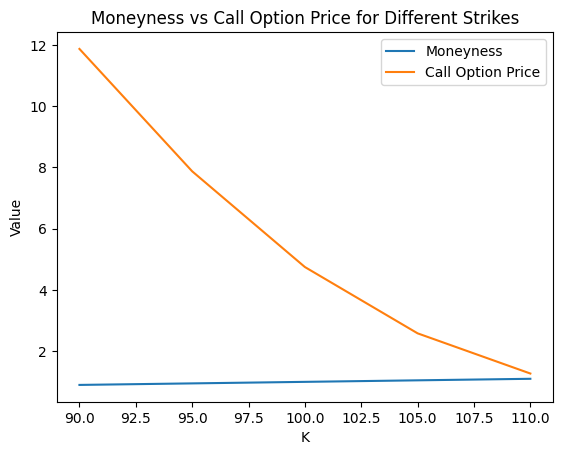

In [93]:
import matplotlib.pyplot as plt

K_values = [90, 95, 100, 105, 110]

m_values = [K / S for K in K_values]
result_values = [american_option_mc(S, K, r, sigma, T, t, Ite, steps)[0] for K in K_values]

plt.plot(K_values, m_values, label='Moneyness')
plt.plot(K_values, result_values, label='Call Option Price')
plt.xlabel('K')
plt.ylabel('Value')
plt.title('Moneyness vs Call Option Price for Different Strikes')
plt.legend()
plt.show()

##### ** Observation **
K = 90: Call price = 11.87, Moneyness = 0.90\
K = 95: Call price = 7.87, Moneyness = 0.95\
K = 100: Call price = 4.75, Moneyness = 1.00\
K = 105: Call price = 2.58, Moneyness = 1.05\
K = 110: Call price = 1.27, Moneyness = 1.10

Above results and graph shows opposite direction of the movement of the call option price and moneyness.\
Moneyness is measured as $$m = K / S$$

For call options, the moneyness increases as the option price goes down, and vice versa.\
It makes sense because call option gives the investors the right to buy the underlying stock at strike in the future.\
The lower the strike is, the investor spends less on buying the underlying stock in the future, \
hence the more intrinsic value with the call option.\
Therefore the call option price is higher for lower strike and moneyness, and vice versa.

##### Under Monte-Carlo simulation, price American Put option corresponding to the 5 different strikes.

In [94]:
def american_put_option_mc(S, K, r, sigma, T, t, Ite, steps):
    np.random.seed(40)
    dt = (T - t) / steps
    discount = np.exp(-r * dt)

    # Generate simulated price paths
    ST = np.zeros((Ite, steps + 1))
    ST[:, 0] = S
    for i in range(1, steps + 1):
        z = np.random.normal(0, 1, Ite)
        ST[:, i] = ST[:, i - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)

    # Initialize payoff matrix
    payoff = np.maximum(0, K - ST)

    # Initialize cashflows with terminal payoff
    cashflows = payoff[:, -1]

    for i in range(steps - 1, 0, -1):
        # Identify in-the-money paths
        in_the_money = payoff[:, i] > 0
        X = ST[in_the_money, i]
        Y = cashflows[in_the_money] * discount

        # Fit regression model to estimate continuation value
        if len(X) == 0:
            continue
        reg = np.polyfit(X, Y, 2)
        continuation_value = np.polyval(reg, X)

        # Update cashflows: max of immediate exercise and continuation value
        cashflows[in_the_money] = np.maximum(payoff[in_the_money, i], continuation_value)
        cashflows[~in_the_money] *= discount

    # Discount the first time step
    cashflows *= discount

    # Calculate m = K / S
    m = K / S

    return np.mean(cashflows), m

# Set the values of K
K_values = [90, 95, 100, 105, 110]

# Create empty lists to store the results
results = []
m_values = []

# Loop through the K values and run the function for each value
for K in K_values:
    result, m = american_put_option_mc(S, K, r, sigma, T, t, Ite, steps)
    results.append(result)
    m_values.append(m)

# Print the results
for K, result, m in zip(K_values, results, m_values):
   print(f"K = {K}: Put price = {result:.2f}, Moneyness = {m:.2f}")

<ipython-input-94-5044bc7226c6>:28: RankWarning: Polyfit may be poorly conditioned
  reg = np.polyfit(X, Y, 2)
<ipython-input-94-5044bc7226c6>:28: RankWarning: Polyfit may be poorly conditioned
  reg = np.polyfit(X, Y, 2)


K = 90: Put price = 0.57, Moneyness = 0.90
K = 95: Put price = 1.55, Moneyness = 0.95
K = 100: Put price = 3.47, Moneyness = 1.00
K = 105: Put price = 6.42, Moneyness = 1.05
K = 110: Put price = 10.31, Moneyness = 1.10


<ipython-input-94-5044bc7226c6>:28: RankWarning: Polyfit may be poorly conditioned
  reg = np.polyfit(X, Y, 2)
<ipython-input-94-5044bc7226c6>:28: RankWarning: Polyfit may be poorly conditioned
  reg = np.polyfit(X, Y, 2)


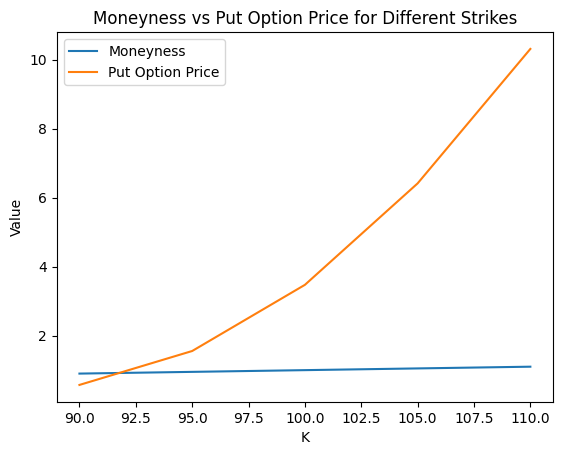

In [95]:
import matplotlib.pyplot as plt

K_values = [90, 95, 100, 105, 110]

m_values = [K / S for K in K_values]
result_values = [american_put_option_mc(S, K, r, sigma, T, t, Ite, steps)[0] for K in K_values]

plt.plot(K_values, m_values, label='Moneyness')
plt.plot(K_values, result_values, label='Put Option Price')
plt.xlabel('K')
plt.ylabel('Value')
plt.title('Moneyness vs Put Option Price for Different Strikes')
plt.legend()
plt.show()

##### ** Observation **
Based on results from above calculations:\
K = 90: Put price = 0.57, Moneyness = 0.90\
K = 95: Put price = 1.55, Moneyness = 0.95\
K = 100: Put price = 3.47, Moneyness = 1.00\
K = 105: Put price = 6.42, Moneyness = 1.05\
K = 110: Put price = 10.31, Moneyness = 1.10\

Moneyness, measured as $m = K / S0$, moves in the same direction as the put option price, that is,\
the moneyness increases as the strike goes up, and vice versa.\
It makes sense because put option gives the investors the right to sell the underlying stock at strike in the future.\
The higher the strike means, the more the investor receives on selling the underlying stock in the future, \
hence the more intrinsic value with the put option.\
Therefore the put option price is higher for higher strike and moneyness, and vice versa.

# Step 3

#Team member A

In [96]:
# Black-Scholes model in Python
import numpy as np
import scipy.stats as ss

# Data for input in Black-Scholes formula:

T = 3/12  # supposed in years. It is not the maturity, but the time to maturity
S = 100.0
K = 110.0
r = 0.05
vol = 0.20  # supposing it is annual
option_type = "C"  # for the put insert 'P'
# dividend yield assumed to be 0

# Compute d1 and d2
d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
d2 = d1 - vol * np.sqrt(T)

if option_type in ["C", "P"]:
    if option_type in ["C"]:
        Opt_Price = S * ss.norm.cdf(d1) - K * np.exp(-r * T) * ss.norm.cdf(d2)
        Delta = ss.norm.cdf(d1)
        Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
        Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) - r * K * np.exp(
            -r * T
        ) * ss.norm.cdf(d2)
        Rho = K * T * np.exp(-r * T) * ss.norm.cdf(d2)
    else:
        Opt_Price = K * np.exp(-r * T) * ss.norm.cdf(-d2) - S * ss.norm.cdf(-d1)
        Delta = -ss.norm.cdf(-d1)
        Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
        Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) + r * K * np.exp(
            -r * T
        ) * ss.norm.cdf(-d2)
        Rho = -K * T * np.exp(-r * T) * ss.norm.cdf(-d2)
else:
    Opt_Price = "Error: option type incorrect. Choose P for a put option or C for a call option."

print("110% moneyness of European Call Option price = {}".format(Opt_Price))
print("Delta = {}".format(Delta))
print("Gamma = {}".format(Gamma))
print("Vega = {}".format(Vega))
print("Theta = {}".format(Theta))
print("Rho = {}".format(Rho))

110% moneyness of European Call Option price = 1.1911316636130742
Delta = 0.21825450140567387
Gamma = 0.029474056882908363
Vega = 14.73702844145418
Theta = -6.926527300429388
Rho = 5.158579619238578


Using the Black Scholes Method to calculate European call option with the 110% moneyness. The other information is retrieved from GWP1 of S0 = 100; r = 5%; σ = 20%; T = 3 months. Since, this option is an OTM at T0, the premium prices will be lower. Based on the calculation, the premium price of this option is $1.19

In [97]:
# Black-Scholes model in Python
import numpy as np
import scipy.stats as ss

# Data for input in Black-Scholes formula:

T = 3/12  # supposed in years. It is not the maturity, but the time to maturity
S = 100.0
K = 95.0
r = 0.05
vol = 0.20  # supposing it is annual
option_type = "P"  # for the put insert 'P'
# dividend yield assumed to be 0

# Compute d1 and d2
d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
d2 = d1 - vol * np.sqrt(T)

if option_type in ["C", "P"]:
    if option_type in ["C"]:
        Opt_Price = S * ss.norm.cdf(d1) - K * np.exp(-r * T) * ss.norm.cdf(d2)
        Delta = ss.norm.cdf(d1)
        Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
        Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) - r * K * np.exp(
            -r * T
        ) * ss.norm.cdf(d2)
        Rho = K * T * np.exp(-r * T) * ss.norm.cdf(d2)
    else:
        Opt_Price = K * np.exp(-r * T) * ss.norm.cdf(-d2) - S * ss.norm.cdf(-d1)
        Delta = -ss.norm.cdf(-d1)
        Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
        Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) + r * K * np.exp(
            -r * T
        ) * ss.norm.cdf(-d2)
        Rho = -K * T * np.exp(-r * T) * ss.norm.cdf(-d2)
else:
    Opt_Price = "Error: option type incorrect. Choose P for a put option or C for a call option."

print("95% moneyness of European Put Option price = {}".format(Opt_Price))
print("Delta = {}".format(Delta))
print("Gamma = {}".format(Gamma))
print("Vega = {}".format(Vega))
print("Theta = {}".format(Theta))
print("Rho = {}".format(Rho))

95% moneyness of European Put Option price = 1.5342604771222845
Delta = -0.24574750481397373
Gamma = 0.03148797683362462
Vega = 15.74398841681231
Theta = -4.992144818798941
Rho = -6.5272527396299145


The European put option’s status also OTM. The price is relatively low and cost $1.53.

b. Delta Hedging (Call option)

European call option

In [98]:
T = 3/12  # supposed in years. It is not the maturity, but the time to maturity
S = 100.0
K = 110.0
r = 0.05
vol = 0.20  # supposing it is annual
option_type = "C"

d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
d2 = d1 - vol * np.sqrt(T)

if option_type in ["C", "P"]:
    if option_type in ["C"]:
        Opt_Price = S * ss.norm.cdf(d1) - K * np.exp(-r * T) * ss.norm.cdf(d2)
        Delta = ss.norm.cdf(d1)
        Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
        Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) - r * K * np.exp(
            -r * T
        ) * ss.norm.cdf(d2)
        Rho = K * T * np.exp(-r * T) * ss.norm.cdf(d2)
    else:
        Opt_Price = K * np.exp(-r * T) * ss.norm.cdf(-d2) - S * ss.norm.cdf(-d1)
        Delta = -ss.norm.cdf(-d1)
        Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
        Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) + r * K * np.exp(
            -r * T
        ) * ss.norm.cdf(-d2)
        Rho = -K * T * np.exp(-r * T) * ss.norm.cdf(-d2)
else:
    Opt_Price = "Error: option type incorrect. Choose P for a put option or C for a call option."

print("110% moneyness of European Call Option price's Delta = {}".format(Delta))

110% moneyness of European Call Option price's Delta = 0.21825450140567387


European Put option

In [99]:
T = 3/12  # supposed in years. It is not the maturity, but the time to maturity
S = 100.0
K = 95.0
r = 0.05
vol = 0.20  # supposing it is annual
option_type = "P"

d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
d2 = d1 - vol * np.sqrt(T)

if option_type in ["C", "P"]:
    if option_type in ["C"]:
        Opt_Price = S * ss.norm.cdf(d1) - K * np.exp(-r * T) * ss.norm.cdf(d2)
        Delta = ss.norm.cdf(d1)
        Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
        Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) - r * K * np.exp(
            -r * T
        ) * ss.norm.cdf(d2)
        Rho = K * T * np.exp(-r * T) * ss.norm.cdf(d2)
    else:
        Opt_Price = K * np.exp(-r * T) * ss.norm.cdf(-d2) - S * ss.norm.cdf(-d1)
        Delta = -ss.norm.cdf(-d1)
        Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
        Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) + r * K * np.exp(
            -r * T
        ) * ss.norm.cdf(-d2)
        Rho = -K * T * np.exp(-r * T) * ss.norm.cdf(-d2)
else:
    Opt_Price = "Error: option type incorrect. Choose P for a put option or C for a call option."

print("95% moneyness of European Put Option price's Delta = {}".format(Delta))

95% moneyness of European Put Option price's Delta = -0.24574750481397373


b. The delta of European call option is 0.218 and put option is -0.246.

Based on the option of call and put is $1.19 and $1.53, respectively. Buying of both options required a total cost of $$2.72. Assume there is a 100 shares and cost of option is $272.

With the initial capital of $100, it should buy 0.218 shares which cost $21.8 (0.218 *100) for call option. While the put option should buy 0.246 shares of right to sell at specific strike price which cost $25.6 (0.246*100).

The delta portfolio is sum of delta of call and put option which 0.218 + (-0.246) = -0.028. The value shows negative which indicate a bearish stance. To hedge with the portfolio, it should buy 0.028 of units at $$2.80 to neutralize the shortfall of the negative delta.  
As a conclusion, the total capital will be used is $274.8 with $2.80 of delta hedging.


c.	Delta Hedging with buying call and selling put.
The delta of European call option is 0.218 and put option is -0.246. Since it is selling put option, this it gains $24.6 of 0.246 units.

The delta portfolio is 0.218 + 0.246 = 0.464. Positive of delta means bullish stance; to hedge with the positive value, it should sell 0.464 units at $46.40.

Assume there is 100 shares, since it selling put option which consider as revenue, it expected to gain $153 and the cost of buying call option is $119. Thus, it still remains $34 and the other revenue came from delta hedge, $46.40. The total revenue is $80.40 and no additional cost incurred.


# Team member B

In [100]:
np.random.seed(42)

def price_uao_barrier_option(S0, K, r, sigma, T, barrier, Ite=10000):
    dt = 1 / 252  # Daily time-step
    steps = int(T * 252)  # Number of time-steps
    discount_factor = np.exp(-r * T)

    payoffs = np.zeros(Ite)

    for i in range(Ite):
        S = S0
        barrier_breached = False

        for j in range(steps):
            z = np.random.normal()
            S = S * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)

            if S >= barrier:
                barrier_breached = True
                break

        if not barrier_breached:
            payoffs[i] = max(S - K, 0)

    option_price = np.mean(payoffs) * discount_factor
    return option_price

# Parameters
S0 = 120  # Initial stock price
r = 0.06  # Risk-free rate
sigma = 0.30  # Volatility
T = 8 / 12  # Time to maturity in years (8 months)
K = S0  # ATM option, strike price is equal to the initial stock price
barrier = 141  # Barrier level

# Pricing the Up-and-Out barrier option
uao_barrier_option_price = round(price_uao_barrier_option(S0, K, r, sigma, T, barrier, Ite), 2)

print(f"Up-and-Out Barrier Option price is: {uao_barrier_option_price}")


Up-and-Out Barrier Option price is: 0.73


The calculated Up-and-Out Barrier Option price is: 0.71. A payoff is only potential if underlying price does not exceed the barrier level of 141 during its life span. The function simulates the price paths for breach of barrier, if true the option expires worthless

# Team Member C

###  Q9 a. the price of the UAI option

In [101]:
# Parameters
S0 = 120  # Initial stock price
r = 0.06  # Risk-free rate
sigma = 0.30  # Volatility
T = 8 / 12  # Time to maturity in years (8 months)
K = S0  # ATM option, strike price is equal to the initial stock price
barrier = 141  # Barrier level
Ite = 10000  # Number of simulations for reliable estimate

def price_uai_barrier_option(S0, K, r, sigma, T, barrier, Ite=10000):
    dt = T / 252  # Daily time-step
    total_payoff = 0

    for _ in range(Ite):
        S = S0
        for _ in range(int(T * 252)):
            dS = r * S * dt + sigma * S * np.sqrt(dt) * np.random.normal()
            S += dS
            if S >= barrier:
                total_payoff += max(S - K, 0)
                break
    return round(total_payoff / Ite * np.exp(-r * T), 2)

option_price = price_uai_barrier_option(S0, K, r, sigma, T, barrier)
print("Up-and-In barrier (UAI) option:", option_price)

Up-and-In barrier (UAI) option: 8.67


###Q9 b. Compute the Price of Vanilla Option

In [102]:
def vanilla_option_price(S0, K, r, sigma, T):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    option_price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return round(option_price, 2)

S0 = 120
K = 120
r = 0.06
sigma = 0.3
T = 8 / 12  # 将 8 个月转换为年

option_price = vanilla_option_price(S0, K, r, sigma, T)
print("Price of Vanilla Option:", option_price)

Price of Vanilla Option: 13.97


###Q9 c. UAO UAI v.s. Vanilla option

** Observation **
As computed above, the Price of Vanilla Option of 13.97 is higher than barrier options UAO of 0.71 and UAI of 8.69.

The vanilla option is the most common type of option, and its price is mainly determined by the difference between the underlying asset price and the strike price, as well as the time to expiration and the volatility of the underlying asset.

For the barrier options UAO (Up-and-Out option) and UAI (Up-and-In option), their pricing is more complex than the vanilla option as their payoffs depend on whether the underlying asset price reaches a certain barrier level.

The UAO pays off only if the underlying asset price does not reach the barrier level before expiration, while the UAI pays off only if the underlying asset price reaches the barrier level before expiration.

Our results make sense as vanilla option gives the holder the potential for unlimited profit if the price of the underlying asset moves in a favorable direction. In contrast, the UAO and UAI options have limited potential payoff because they can be knocked out or knocked in if the underlying asset price reaches a certain level.